# Inferential Statistics
statistik yang digunakan untuk membuat konklusi dari data

Terminologi:
- population - keselurhan data yang sedang kita obervasi
- sample - sebagian dari data population
- outlier - data yang jauh berbeda dari kebanyakan data lainnya di dataset
- random variable - satu data di dataset kita
- discrete - saat datanya memiliki batasan yang jelas satu sama lain
- continuous - saat datanya terus berjalan tanpa batasan antara satu dan yang lainnya (waktu, uang, berat, jarak,...)
- distribution - bentuk dari chart histogram dari dataset kita yang menunjukkan probabilitas mendapatkan sebuah value

untuk discrete random variable, kita bisa dapatkan bentuk distribution seperti uniform, binomial, bernoulli, poisson distribution, ...

untuk continuous random varable, kita bisa dapatkan bentuk distribution seperti uniform, normal, gamma, ...

---

Setelah kita mendapatkan data yang bentuknya normal distribution, kita bisa terapkan teknik inferential statistik:
1. Confidence Interval
2. Hypothesis testing

---

Confidence Interval adalah saat kita membuat pernyataan tentang tengah dan penyebaran dataset kita, dalam sebuah statement. Kita seperti merangkum hasil hitungan descriptive statistics, tapi dengan cara tertentu.

Ada formula untuk menghitung CI yang harus kita ikuti.

---

Hypothesis Testing adalah saat kita membuat pernyataan tentang data kita.
- "Dulu lebih banyak orang yang suka makan mie daripada sekarang."
- "Kalau kita pergi olahraga 3x seminggu, dibandingkan pergi olahraga 1x seminggu, berat badan kita akan lebih ringan."

Semua statement ini harus dibuat berdasarkan data, dan dengan formula statistik menghitung p-value. Kita hitung apakah ada perbedaan yang signifikan antara dua grup (grup 3x olahraga vs grup 1x olahraga) (grup dulu, grup sekarang) apakah ada perbedaan yang bisa dibilang "signifikan" antara kedua grup ini untuk kita bisa bikin statement yang membedakan keduanya.

In [ ]:
import pandas as pd
import numpy as np

from scipy.stats import uniform, norm

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import statsmodels.api as sm

In [ ]:
# membuat contoh data yang bentuk distribusinya uniform
# kita buat contoh data menggunakan package scipy stats, module uniform

data_uniform = uniform.rvs(
    size = 10000,   # berapa data
    loc = 50,       # datanya mulai dari mana
    scale = 10,     # loc + scale = max data
)

data_uniform

array([54.00283445, 51.83487126, 52.6525246 , ..., 59.91725634,
       59.28301485, 53.47989041])

c:\Users\stefa\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


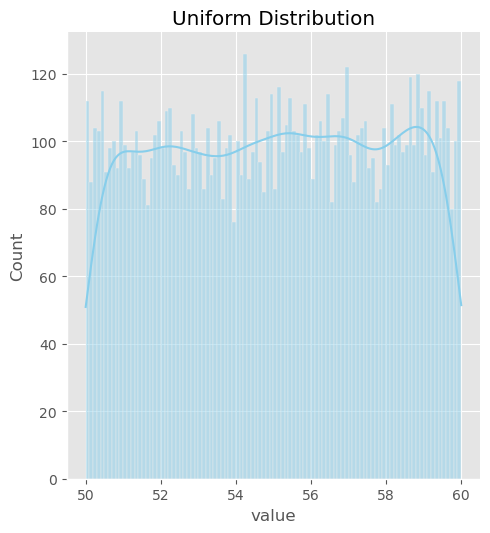

In [ ]:
# setelah dummy data dibuat, kita buat chart distribusi nya menggunakan seaborn

sns.displot(
    data_uniform,
    bins = 100,
    kde = True,
    color = 'skyblue'
)

plt.title("Uniform Distribution")
plt.xlabel("value")
plt.show()

In [ ]:
# contoh data terdistribusi normal

data_norm = norm.rvs(
    size = 10000,   # berapa data
    loc = 50,       # tengah data
    scale = 10,     # penyebaran
)

data_norm

array([50.24580025, 48.60502293, 40.32039346, ..., 55.10691841,
       43.31128626, 44.85979966])

c:\Users\stefa\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


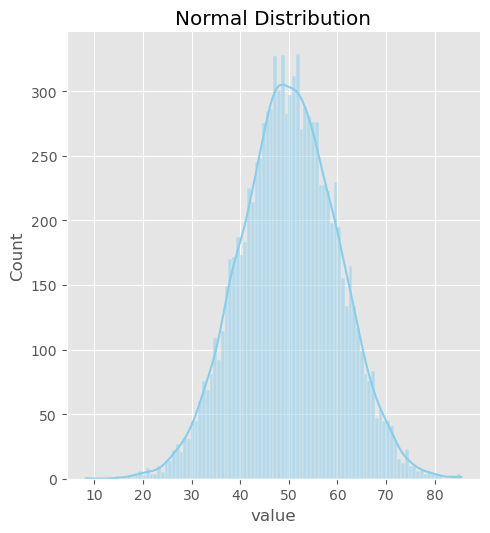

In [ ]:
sns.displot(
    data_norm,
    bins = 100,
    kde = True,
    color = 'skyblue'
)

plt.title("Normal Distribution")
plt.xlabel("value")
plt.show()

# Confidence Interval

Best Estimate +- Margin of Error

dimana, ada dua jenis confidence interval yang bisa kita buat yaitu:
1. CI untuk rata-rata
2. CI untuk proporsi

contohnya:
- "rata rata nilai anak kelas A ada di antara 60-90" --> best estimate 75 dengan margin of error 15. jadi 75 +- 15 atau 60-90
- "50-60% anak kelas A yang nilainya diatas 80" --> best estimate 55% dengan margin of error 5%. jadi kita dapat 55 +- 5 atau 50-60%

untuk menghitung best estimate dan margin of error, ada formulanya. Untuk rata-rata dan untuk proporsi.

## **Untuk CI rata-rata**   
Best_Estimate = mean   
Margin_of_Error = z-score * standard_error   
standard_error = standard_deviation / sqrt(jumlah_data)

mean dan standard_deviation bisa kita cari menggunakan teknik descriptive statistics yang sudah dipelajari. jumlah_data langsung dihitung dari jumlah data di dataset kita. z_score adalah angka representatif untuk tingkat keyakinan pada statement yang kita buat.

umumnya confidence ada di 95%, memberikan statement yang kita buat 5% margin error. Jika ada data yang diluar statement yang kita buat, kita bisa bilang, itu termasuk dari 5% margin error karena tingkat keyakinan kita di 95%.

z_score kita set ke 1.96 dengan tingkat keyakinan di 95%

## **Untuk CI proporsi**   
Best_Estimate = p   
Margin_of_Error = z-score * standard_error   
standard_error = sqrt(p * (1-p) / jumlah_data)

p adalah proporsi. Jadi untuk contoh yang kita bahas sebelumnya, proporsi anak kelas A yang nilainya diatas 80 berapa? kita hitung dari dataset kita. angka ini adalah p atau best estimate kita. kita gunakan angka p ini dan jumlah_data (jumlah dataset kita) untuk dapat standard_error. z-score masih sama di 1.96 untuk tingkat keyakinan 95%.







## Studi kasus
kita gunakan dataset tentang pasien stroke dari https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset atau raw datanya dari https://raw.githubusercontent.com/stefkwan-h8/dataset/main/stroke.csv untuk cari beberapa angka confidence interval

In [ ]:
df_stroke = pd.read_csv("stroke.csv")
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df_stroke2 = df_stroke.dropna()
df_stroke2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df_stroke2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


## Case 1 - Confidence Interval untuk rata-rata umur pasien yang memiliki stroke
- CI rata-rata
- untuk umur pasien
- khusus pasien yang punya stroke

dari dataset kita, kita filter dulu khusus untuk pasien yang punya stroke.

setelah itu, kita ambil data kolom umur saja.

dari sana baru kita cari rata-rata, standard deviation, jumlah_data, untuk dapat best_estimate dan margin_of_error, baru bisa dapat CI rata-rata.

In [ ]:
# filter pasien stroke

df_stroke_yes = df_stroke2[df_stroke2['stroke'] == 1]
df_stroke_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 248
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 209 non-null    int64  
 1   gender             209 non-null    object 
 2   age                209 non-null    float64
 3   hypertension       209 non-null    int64  
 4   heart_disease      209 non-null    int64  
 5   ever_married       209 non-null    object 
 6   work_type          209 non-null    object 
 7   Residence_type     209 non-null    object 
 8   avg_glucose_level  209 non-null    float64
 9   bmi                209 non-null    float64
 10  smoking_status     209 non-null    object 
 11  stroke             209 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 21.2+ KB


In [ ]:
n = len(df_stroke_yes)    # jumlah pasien stroke

mean = df_stroke_yes['age'].mean()    # rata rata umur

z = 1.96     # saat confidence 95% maka z adalah 1.96

sd = df_stroke_yes['age'].std()   # standard deviation umur




be = mean
se = sd / np.sqrt(n)
moe = z * se


print(be - moe, be + moe)

66.03138964607892 69.39444767449525


rata-rata umur pasien stroke ada di antara 66 - 69 tahun

## Latihan Pendek
coba cari Confidence Interval untuk rata-rata BMI pasien stroke

In [ ]:
n = len(df_stroke_yes)    # jumlah pasien stroke

mean = df_stroke_yes['bmi'].mean()    # rata rata bmi

z = 1.96     # saat confidence 95% maka z adalah 1.96

sd = df_stroke_yes['bmi'].std()   # standard deviation bmi




be = mean
se = sd / np.sqrt(n)
moe = z * se


print(be - moe, be + moe)

29.613169885063872 31.32941384699355


rata rata BMI pasien stroke ada di antara 29.6-31.3

## CI untuk proporsi
contoh: berapa % pasien umurnya 60 keatas memiliki stroke?

- kita filter dulu datanya menjadi khusus pasien umur 60 keatas
- lalu kita hitung p, persentase pasien yang memiliki stroke
- kita hitung juga n, jumlah pasien umur 60 keatas

In [ ]:
df_lansia = df_stroke2[df_stroke2['age'] >= 60]
df_lansia.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [ ]:
n = len(df_lansia)
print(n)

1285


ada 1285 pasien umur 60 keatas

In [ ]:
df_punya_stroke = df_lansia[df_lansia['stroke'] == 1]
n_punya_stroke = len(df_punya_stroke)
print(n_punya_stroke)

150


ada 150 dari 1285 pasien umur 60 keatas yang memiliki stroke

In [ ]:
p = n_punya_stroke / n
print(p)

0.11673151750972763


In [ ]:
z = 1.96 # tidak berubah, 95% confidence, maka z = 1.96

be = p
se = np.sqrt(p * (1-p) / n)
moe = z * se

print(be - moe, be + moe)

0.09917473455768705 0.1342883004617682


9.9 - 13.4% pasien umur 60 keatas menderita stroke

# Hypothesis Testing
teknik untuk membuat statement pembanding
- pembanding rata-rata
- pembanding proporsi

"dulu lebih banyak orang yang suka x daripada sekarang" -- membandingkan proporsi dulu dan sekarang

"rata-rata berat badan pria lebih berat daripada berat badan wanita" -- membandingkan rata-rata pria dan wanita

untuk membuat statement seperti ini, kita perlu buat dulu hipotesanya:
- H0, null hypothesis, asumsi awal
- H1, alternate hypotesis, asumsi yang mau kita buat, untuk membantu statement kita

1. kita akan buat dulu H1 alternate hypothesis berdasarkan statement asumsi BARU kita
2. lalu dari sana kita buat statement berkebalikan H0 null hypothesis
3. lalu kita akan hitung p-value (menggunakan rumus statistik)
4. jika p-value ada <= alpha (alpha adalah margin of error 5% atau 0.05), maka kita bisa REJECT null hypothesis, dan kita bisa buat asumsi dimana H1 alternate hypothesis kita benar. dengan tingkat keyakinan 95%.
5. jika p-value > alpha, maka kita gagal untuk REJECT null hypothesis. kita tidak bisa membuat asumsi baru. tidak ada perbedaan yang signifikan dari hal yang kita bandingkan.

# One Population Proportion
mencari apakah ada perbedaan proporsi dari populasi yang sama, dulu dan sekarang.

dulu: 52% pecaya x

sekarang: 56% percaya x, dari hasil survey 1018 orang

statement kita: sekarang lebih banyak yang percaya x

``` python
# alternate hypothesis bilang sekarang proporsi lebih besar dari dulu
H1: p > 0.52

# null hypothesis bilang tidak ada perbedaan dari dulu di 52%
H0: p = 0.52
```

kita cari p-value, dengan bantuan proportions_ztest() dari statsmodels

```python
import statsmodels.api as sm

# function yang mau kita gunakan dari statsmodels
sm.stats.proportions_ztest()
```

kalau sudah, kita bandingkan p-value dengan alpha (error margin) 0.05

jika p-value <= alpha, maka kita REJECT null hypothesis

jika p-value > alpha, maka kita FAIL to REJECT null hypothesis

In [ ]:
# total orang yang di survey
n = 1018

# proporsi yang percaya x sekarang
phat = 0.56

# proporsi yang percaya x dulu
pnull = 0.52

# kita hitung pvalue nya
zstat, pvalue = sm.stats.proportions_ztest(phat*n, n, pnull, alternative='larger')

print(pvalue)

0.005069273865860533


In [ ]:
alpha = 0.05
if (pvalue <= alpha):
    print("REJECT null hypothesis")
else:
    print("FAIL to REJECT null hypothesis")

REJECT null hypothesis


proporsi yang percaya x sekarang lebih banyak daripada dulu

## Difference in Population Means
Perbedaan antara rata-rata dua populasi

studi kasus: kita bisa gunakan dataset stroke kita tadi untuk membandingkan rata-rata bmi pria dan wanita

kita mau buat statement kalau rata-rata bmi pria dan wanita itu berbeda. bisa lebih kecil, bisa lebih besar, tapi tidak sama.

H1: bmi_pria != bmi_wanita   
H0: bmi_pria == bmi_wanita

dari dataset kita akan perlu value:
- berapa wanita, n_wanita
- rata-rata bmi wanita, mean_wanita
- standard deviation bmi wanita, sd_wanita
- berapa pria, n_pria
- rata-rata bmi pria, mean_pria
- standard deviation bmi pria, sd_pria

kita akan gunakan function ztest dari package statsmodels untuk menghitung p-value untuk statement seperti ini

```python
import statsmodels.api as sm

sm.stats.ztest()
```

In [ ]:
df_stroke2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df_pria = df_stroke2[df_stroke2['gender'] == 'Male']
df_wanita = df_stroke2[df_stroke2['gender'] == 'Female']

n_wanita = len(df_wanita)
mean_wanita = df_wanita['bmi'].mean()
sd_wanita = df_wanita['bmi'].std()

n_pria = len(df_pria)
mean_pria = df_pria['bmi'].mean()
sd_pria = df_pria['bmi'].std()

print(n_wanita, mean_wanita, sd_wanita)
print(n_pria, mean_pria, sd_pria)

2897 29.065757680359038 8.110782996454192
2011 28.647936350074616 7.464493029469011


In [ ]:
zstat, pvalue = sm.stats.ztest(df_pria['bmi'], df_wanita['bmi'], alternative='two-sided')

print(pvalue)

0.06676993495253476


In [ ]:
alpha = 0.05
if (pvalue <= alpha):
    print("REJECT null hypothesis")
else:
    print("FAIL to REJECT null hypothesis")

FAIL to REJECT null hypothesis


dari dataset yang kita gunakan, tidak ada perbedaan yang signifikan antara rata-rata bmi pria dan wanita